In [ ]:
import os
import folium

import pandas as pd
import scipy.stats as stats

from scipy.stats import gaussian_kde

# from utils.plotting

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [21]:
DATA_PATH = "../data"
CAR_FILES = DATA_PATH + "/polo"

In [20]:
datasets = {}

for obd_type in os.listdir(CAR_FILES):
    datasets[obd_type] = {}

    for csv_file in os.listdir(CAR_FILES + "/" + obd_type):
        if "debug" in csv_file:
            datasets[obd_type]["debug"] = pd.read_csv(CAR_FILES + "/" + obd_type + "/" + csv_file)
        else:
            datasets[obd_type]["data"] = pd.read_csv(CAR_FILES + "/" + obd_type + "/" + csv_file)

# Data Analysis

In [25]:
algorithmns_columns = [col for col in datasets["A"]["data"].columns if "(microseconds)" in col]

algorithmns_columns

['FuelModelPredictionTime(microseconds)',
 'TedaModelPredictionTime(microseconds)',
 'DriveBehaviourModelPredictionTime(microseconds)',
 'CityRoadModelPredictionTime(microseconds)']

## OBD - A

In [22]:
datasets["A"]["data"].head()

,Device,Usuario,SessionDate,TimeSensor,Vin,Latitude,Longitude,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,...,EthanolPercentage,RelativeThrottlePos,AcceleratorPedalPosD,AcceleratorPedalPosE,AbsoluterThrottlePosB,CatalystTempBank1Sensor1,EngineFuelRate,AbsoluteLoadValue,AirFuelRatio,AbsoluteBarometricPressure
0,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:01.310694,9BWAH5BZ4KP599863,0.000000,0.000000,-0.452543,4.953442,8.388937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:02.309164,9BWAH5BZ4KP599863,0.000000,0.000000,-0.229711,4.469793,8.949157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:03.310309,9BWAH5BZ4KP599863,-5.842986,-35.197654,-1.295115,7.646863,6.176773,...,26.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:04.310620,9BWAH5BZ4KP599863,-5.842986,-35.197654,-0.189033,8.609076,10.397712,...,26.27,13.0,15.0,15.0,83.0,206.3,0.0,68.0,NaN,NaN
4,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 13:34:00,2025-02-13 13:34:05.308647,9BWAH5BZ4KP599863,-5.842986,-35.197654,1.886442,4.608576,8.628220,...,26.27,13.0,15.0,15.0,83.0,206.3,0.0,68.0,1.0,100.0


In [26]:
datasets["A"]["data"][algorithmns_columns]

,FuelModelPredictionTime(microseconds),TedaModelPredictionTime(microseconds),DriveBehaviourModelPredictionTime(microseconds),CityRoadModelPredictionTime(microseconds)
0,0,1,319,189
1,0,2,253,162
2,24878,1,253,119
3,219,2,253,189
4,225,2,560,200
...,...,...,...,...
635,250,2,296,211
636,252,2,296,203
637,141,2,296,116
638,248,2,318,209


Foi plotado até 5000 pontos para melhor visualização. Somente um valor está acima de 5000.

In [67]:
(datasets["A"]["data"][algorithmns_columns]["FuelModelPredictionTime(microseconds)"] > 5000).sum()

np.int64(1)

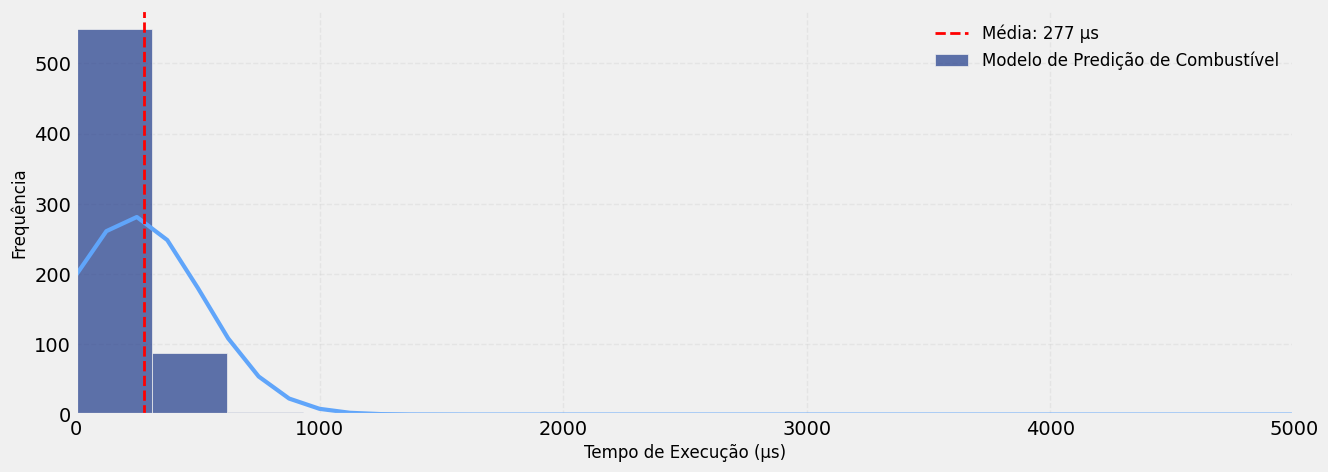

In [ ]:
plt.figure(figsize=(14, 5))

hist = sns.histplot(
    x=datasets["A"]["data"][algorithmns_columns]["FuelModelPredictionTime(microseconds)"],
    bins=80,
    kde=True,
    alpha=0.7,
    color="#1E3A8A",
    label="Modelo de Predição de Combustível"
)

kde_line = hist.get_lines()[0]
kde_line.set_color("#60A5FA")
kde_line.set_linewidth(3)

mean_value = datasets["A"]["data"][algorithmns_columns]["FuelModelPredictionTime(microseconds)"].mean()
plt.axvline(mean_value, color="red", linestyle="--", linewidth=2, label=f"Média: {int(mean_value)} µs")

plt.xlabel("Tempo de Execução (µs)", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

plt.xlim(0, min(5000, datasets["A"]["data"][algorithmns_columns]["FuelModelPredictionTime(microseconds)"].max()))

plt.legend(loc="upper right", frameon=False, fontsize=12)

plt.grid(True, linestyle="--", alpha=0.3)

plt.show()


## OBD - B

In [23]:
datasets["B"]["data"].head()

,Device,Usuario,SessionDate,TimeSensor,Vin,Latitude,Longitude,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,...,EthanolPercentage,RelativeThrottlePos,AcceleratorPedalPosD,AcceleratorPedalPosE,AbsoluterThrottlePosB,CatalystTempBank1Sensor1,EngineFuelRate,AbsoluteLoadValue,AirFuelRatio,AbsoluteBarometricPressure
0,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 12:20:36,2025-02-13 12:20:37.053873,9BWAH5BZ4KP599863,0.000000,0.000000,0.320937,3.583850,9.064013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 12:20:36,2025-02-13 12:20:38.053454,9BWAH5BZ4KP599863,0.000000,0.000000,1.410270,3.636492,9.772587,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 12:20:36,2025-02-13 12:20:39.053077,9BWAH5BZ4KP599863,0.000000,0.000000,-1.110868,-3.734897,7.991429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 12:20:36,2025-02-13 12:20:40.054808,9BWAH5BZ4KP599863,-5.843209,-35.197543,0.181855,0.002393,0.371187,...,26.27,6.0,15.0,15.0,16.0,NaN,NaN,NaN,NaN,NaN
4,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-02-13 12:20:36,2025-02-13 12:20:41.055428,9BWAH5BZ4KP599863,-5.843209,-35.197543,0.002393,0.414257,9.703195,...,26.27,6.0,15.0,15.0,16.0,656.3,0.0,32.0,1.0,0.0


# Debug Analysis